In [1]:
import numpy as np
import tensorflow as tf
from random import randint
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

In [2]:
train_X=[]
train_Y=[]

In [3]:
for i in range(50):
    train_X.append(randint(13, 64))
    train_Y.append(1)
    train_X.append(randint(65, 100))
    train_Y.append(0)
    
for i in range(1000):
    train_X.append(randint(13, 64))
    train_Y.append(0)
    train_X.append(randint(65, 100))
    train_Y.append(1)
    
train_X, train_Y=shuffle(train_X, train_Y)

    
print(train_X, train_Y)

[26, 56, 97, 75, 60, 92, 91, 80, 43, 82, 71, 53, 81, 36, 19, 43, 99, 38, 74, 24, 43, 89, 65, 88, 29, 87, 85, 18, 93, 83, 49, 98, 17, 30, 66, 98, 94, 73, 64, 98, 27, 77, 31, 69, 64, 41, 74, 78, 70, 98, 74, 67, 40, 85, 20, 98, 31, 79, 62, 98, 84, 69, 50, 96, 95, 16, 99, 86, 49, 48, 82, 79, 58, 53, 58, 28, 46, 76, 36, 48, 82, 62, 16, 85, 32, 44, 64, 25, 88, 100, 95, 87, 82, 50, 97, 32, 41, 97, 97, 72, 54, 82, 51, 72, 89, 91, 26, 31, 25, 90, 19, 69, 45, 46, 14, 90, 21, 18, 94, 33, 42, 47, 38, 68, 25, 88, 22, 43, 30, 22, 71, 100, 18, 76, 25, 89, 93, 78, 38, 43, 82, 14, 81, 80, 20, 74, 43, 70, 66, 51, 64, 70, 91, 96, 74, 75, 39, 40, 50, 58, 74, 68, 79, 43, 80, 74, 67, 92, 35, 91, 95, 92, 50, 97, 63, 69, 89, 73, 87, 37, 72, 24, 15, 65, 56, 85, 81, 41, 14, 56, 92, 25, 85, 73, 78, 92, 60, 29, 14, 43, 47, 100, 88, 77, 52, 89, 82, 43, 62, 65, 90, 29, 80, 76, 84, 91, 36, 91, 99, 67, 57, 15, 34, 55, 81, 22, 70, 16, 77, 19, 20, 73, 49, 95, 91, 73, 28, 23, 96, 60, 14, 55, 40, 82, 100, 41, 97, 68, 72,

In [4]:
train_X=np.array(train_X)
train_Y=np.array(train_Y)

In [5]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_train_X=scaler.fit_transform(train_X.reshape(-1, 1))
print(scaled_train_X)


[[0.14942529]
 [0.49425287]
 [0.96551724]
 ...
 [0.86206897]
 [0.68965517]
 [0.65517241]]


In [6]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [7]:
model=Sequential([
    Dense(units=16, input_shape=(1,), activation="relu"),
    Dense(units=32, activation="relu"),
    Dense(units=2, activation="sigmoid"),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer=Adam(lr=0.0003), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [9]:
model.fit(x=scaled_train_X, y=train_Y, validation_split=0.2, batch_size=30, epochs=30, shuffle=False, verbose=2)

Epoch 1/30
56/56 - 3s - loss: 0.7821 - accuracy: 0.4631 - val_loss: 0.7604 - val_accuracy: 0.4119
Epoch 2/30
56/56 - 0s - loss: 0.7402 - accuracy: 0.3595 - val_loss: 0.7233 - val_accuracy: 0.3024
Epoch 3/30
56/56 - 0s - loss: 0.7058 - accuracy: 0.3256 - val_loss: 0.6905 - val_accuracy: 0.6190
Epoch 4/30
56/56 - 0s - loss: 0.6758 - accuracy: 0.6607 - val_loss: 0.6598 - val_accuracy: 0.6905
Epoch 5/30
56/56 - 0s - loss: 0.6475 - accuracy: 0.7089 - val_loss: 0.6327 - val_accuracy: 0.7286
Epoch 6/30
56/56 - 0s - loss: 0.6219 - accuracy: 0.7488 - val_loss: 0.6059 - val_accuracy: 0.7690
Epoch 7/30
56/56 - 0s - loss: 0.5952 - accuracy: 0.7821 - val_loss: 0.5778 - val_accuracy: 0.7976
Epoch 8/30
56/56 - 0s - loss: 0.5673 - accuracy: 0.8095 - val_loss: 0.5486 - val_accuracy: 0.8286
Epoch 9/30
56/56 - 0s - loss: 0.5386 - accuracy: 0.8268 - val_loss: 0.5187 - val_accuracy: 0.8524
Epoch 10/30
56/56 - 0s - loss: 0.5096 - accuracy: 0.8399 - val_loss: 0.4892 - val_accuracy: 0.8571
Epoch 11/30
56/56 -

In [10]:
test=np.array([ 35, 45, 99, 65, 72, 31, 67, 80,22,64])
test_Y=np.array([0, 0, 1,1,1,0,1,1,0,0])
test, test_Y=shuffle(test, test_Y)
scaler_test=MinMaxScaler(feature_range=(0,1))
test=scaler_test.fit_transform(test.reshape(-1, 1))
prediction=model.predict(x=test)

In [11]:
print(prediction)

[[0.8013257  0.1903511 ]
 [0.17654303 0.9114973 ]
 [0.5621213  0.49427846]
 [0.80357957 0.18913856]
 [0.5453497  0.5148545 ]
 [0.304283   0.78544897]
 [0.5115343  0.5557868 ]
 [0.42721117 0.65377915]
 [0.7987236  0.19354564]
 [0.79200375 0.20136777]]


In [12]:
rounded_pred=(np.argmax(prediction, axis=1))
print(rounded_pred)

[0 1 0 0 0 1 1 1 0 0]


## Confusion Matrix

In [13]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [14]:
cm= confusion_matrix(y_true=test_Y, y_pred=rounded_pred)

In [15]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[5 0]
 [1 4]]


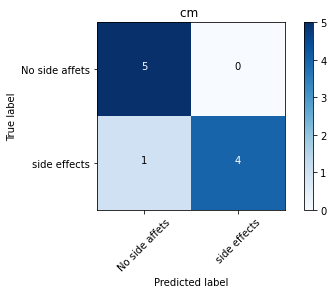

In [16]:
classes=["No side affets", "side effects"]
plot_confusion_matrix(cm=cm, classes=classes, title="cm ")

In [17]:
model.save("test.h5")

In [19]:
from tensorflow.keras.models import load_model
loaded_model=load_model("test.h5")

In [20]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [21]:
loaded_model.get_weights()

[array([[ 0.38786834,  0.27928093,  0.21978931, -0.38418895, -0.48554552,
         -0.03112239,  0.6862441 ,  0.7044105 ,  0.43674496,  0.62935495,
          0.50059676,  0.49435648, -0.07111096,  0.0257336 , -0.48399156,
         -0.03798974]], dtype=float32),
 array([-0.1327784 , -0.09487563,  0.2740901 ,  0.        ,  0.        ,
         0.        , -0.17757377, -0.21527384, -0.1384906 ,  0.30069417,
        -0.16539247, -0.15558727,  0.        , -0.02643446,  0.        ,
         0.        ], dtype=float32),
 array([[ 0.28412107,  0.07918049, -0.3751665 , -0.22319943, -0.08087602,
         -0.13601455, -0.34037957,  0.24416374, -0.26858687,  0.2871972 ,
         -0.16353507, -0.43525442,  0.5659579 ,  0.18908827,  0.07254367,
          0.12863445, -0.06660458,  0.0685156 , -0.15740483, -0.6233055 ,
         -0.10696059,  0.2604686 , -0.30181104, -0.34815183,  0.7225273 ,
         -0.18331097,  0.5640359 ,  0.5454203 ,  0.12185365, -0.06197317,
         -0.15317707,  0.30431423],
 